# Proyek Analisis Data: Bike-sharing-dataset.zip
- **Nama:** NANTHA SEUTIA
- **Email:** ombakrinai@gmail.com
- **ID Dicoding:** ombakrinai@gmail.com

## Karakteristik Dataset
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Catatan Tambahan:

* 'temp' adalah normalisasi temperatur yang dihitung menggunakan skala. Dalam dataset ini 0 adalah nilai temperatur terendah dan 1 nilai maksimum. Misalkan 'temp' adalah 0,5 berarti suhu tersebut berada di tengah-tengah antara suhu minimum dan maksimum.
* 'atemp' adalah variabel perkiraan suhu lingkungan yang dirasa manusia (dipengaruhi oleh temperatur, kelembaban, dan angin) sehingga membuatnya nyaman beraktifitas. Dalam dataset ini diukur menggunakan skala 0-1.





**Insight**

Karena informasi pada kedua file tersebut relatif sama dan hanya dibedakan dengan variabel 'hr' untuk 'hour.csv', maka diputuskan untuk menggunakan data 'hour.csv' karena memiliki data yang lebih banyak.

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola peminjaman sepeda antara pengguna biasa (casual) dibandingkan dengan pengguna terdaftar (registered)
- Bagaimana pengaruh cuaca (suhu, kelembaban, dan kecepatan) terhadap jumlah peminjaman sepeda setiap harinya.

## Import Semua Packages/Library yang Digunakan

In [41]:
# Import necessary libraries
import pandas as pd
import zipfile
import os
import requests

# Start at cleaning data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## Data Wrangling

### Gathering Data

In [42]:
# Gathering Data
# URL of the zip file in your GitHub repository
github_url = 'https://github.com/esnanta/data-analysis/raw/main/Dataset/Bike-sharing-dataset.zip'

# Path to save the zip file
zip_path = '/tmp/Bike-sharing-dataset.zip'

# Download the zip file from GitHub
response = requests.get(github_url)
if response.status_code == 200:
    with open(zip_path, 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully!")
else:
    print("Failed to download the dataset. Check the URL.")

# Extract the zip file to the /tmp directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/tmp')

# File paths for the extracted CSV files
day_csv_path = '/tmp/day.csv'
hour_csv_path = '/tmp/hour.csv'

# Verify extraction
if os.path.exists(day_csv_path) and os.path.exists(hour_csv_path):
    print("Dataset extracted successfully!")
else:
    print("Failed to extract the dataset.")

Dataset downloaded successfully!
Dataset extracted successfully!


In [43]:
# Read the CSV files using pandas
df_hour_data = pd.read_csv(hour_csv_path, delimiter=",")

# Display the first few rows of each dataframe
print("\nHour Data:")
print(df_hour_data.head())


Hour Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
<br>Berdasarkan petunjuk dan data yang ditampilkan, maka data dapat dikelompokkan sebagai berikut:
- Data kontinu : temp, atemp, hum, windspeed
- Data diskret : instant, casual, registered, cnt
- Data ordinal : season, weathersit, weekday
- Data nominal : dteday, yr, mnth, hr, holiday, workingday.

### Assessing Data

In [44]:
# Assessing Data
# check info
df_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
# Memeriksa apakah data ordinal dan nominal memiliki nilai
# yang sesuai dengan petunjuk.
valid_ranges = {
    'season': range(1, 5),         # Seasons: 1 to 4
    'weathersit': range(1, 5),     # Weather situations: 1 to 4
    'weekday': range(0, 7),        # Weekday: 0 (Sunday) to 6 (Saturday)
    'yr': [0, 1],                  # Year: 0 (2011), 1 (2012)
    'mnth': range(1, 13),          # Months: 1 to 12
    'hr' : range(0,24),            # Hour: 24 hour
    'holiday': [0, 1],             # Holiday: 0 (No), 1 (Yes)
    'workingday': [0, 1],          # Working day: 0 (No), 1 (Yes)
}

# List of datasets to check
datasets = {
    "df_hour_data": df_hour_data
}

# Loop through each dataset
for dataset_name, dataset in datasets.items():
    print(f"\nChecking dataset: {dataset_name}")

    # Initialize a report for invalid values
    invalid_values_report = {}

    # Loop through each variable and check for invalid values
    for column, valid_range in valid_ranges.items():
        if column in dataset.columns:
            # Check for invalid values
            invalid_rows = dataset[~dataset[column].isin(valid_range)]
            if not invalid_rows.empty:
                invalid_values_report[column] = invalid_rows

    # Display the results for the current dataset
    if not invalid_values_report:
        print("All ordinal and nominal variables have valid data.")
    else:
        print("The following variables have invalid data:")
        for column, invalid_rows in invalid_values_report.items():
            print(f"Variable '{column}' has invalid values in the following rows:")
            print(invalid_rows)


Checking dataset: df_hour_data
All ordinal and nominal variables have valid data.


In [46]:
# Casual and registered values: Check for negative values
casual_registered_columns = ['casual', 'registered', 'cnt']

# Casual and registered values: Check for negative values
invalid_casual_registered = df_hour_data[
    (df_hour_data['casual'] < 0) | (df_hour_data['registered'] < 0)
]

if not invalid_casual_registered.empty:
    print("\nInvalid values in casual or registered (negative values):")
    print(invalid_casual_registered)
else:
    print("\nNo invalid values in casual or registered columns.")


No invalid values in casual or registered columns.


In [47]:
# Function to check if cnt equals casual + registered
def check_discrepancies(df):
    """
    Checks if the 'cnt' column in the dataframe equals the sum of 'casual' and 'registered'.

    Args:
        df (pd.DataFrame): The dataframe containing 'cnt', 'casual', and 'registered' columns.

    Returns:
        None: Prints the result of the check.
    """
    discrepancy = df[df['cnt'] != (df['casual'] + df['registered'])]

    if not discrepancy.empty:
        print(f"\nDiscrepancies found in {len(discrepancy)} rows:")
        print(discrepancy)
    else:
        print("\nNo discrepancies: cnt equals casual + registered for all rows.")

# Check if cnt equals casual + registered
check_discrepancies(df_hour_data)


No discrepancies: cnt equals casual + registered for all rows.


**Insight**
* Tidak ada data yang bernilai null
* Terdapat kesalahan tipe data untuk 'dteday' yang seharusnya memiliki tipe data 'date'.
* Tidak ditemukan nilai yang tidak sesuai ketentuan pada data ordinal dan nominal
* Tidak ada data yang bernilai minus untuk casual, registered, dan cnt
* Nilai cnt sudah sesuai (casual+registered)

In [48]:
summary = df_hour_data.describe()
print(summary)

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- setiap kolom punya data 17379 yang artinya tidak ada missing value.
- season, yr, mnth, hr terlihat konsisten berdasarkan jumlah data. Perlu analisa distribusi dengan plot frekuensi jika ingin memahami lebih dalam.
- holiday (biner [0,1]) dengan Mean 0,02 menunjukkan jumlah data hari libur yang sedikit. Hari libur bernilai 1 (true).
- weekday Sunday-Saturday (0,6) memiliki Mean 3. Perlu analisa distribusi dengan plot frekuensi jika ingin memahami lebih dalam.
- workingday (biner [0,1]) dengan Mean 0,6 yang berarti lebih banyak hari kerja. Nilai 1 (true) untuk hari kerja.
- weathersit menjelaskan kondisi cuaca dengan rentang 1-4. Nilai Mean 1,4 menunjukkan kondisi cuaca sering cerah atau berawan.
- temp dan atemp memiliki Mean 0,4 yang berarti kondisi cuaca berada di tengah-tengah batas minimal (0) dan maksimal (1).
- humidity dengan Mean 0,6 berarti kelembaban cenderung sedang. Nilai Min : 0 berarti kelembaban kering, dan jika 1 berarti saturasi penuh.
- windspeed dengan Min 0 dan Max 0,8 memiliki Mean mendekati 0,2 yang berarti kondisi kecepatan angin rendah.
- casual punya kemungkinan cenderung ke kanan (right skewed), karena nilai persentil Q1 adalah 4, jauh lebih kecil dari Q3 yang 48. Nilai Standar Deviasi (49) yang lebih besar dari Mean (35) menunjukkan data tersebar luas.
- registered punya kemungkinan cenderung ke kanan (right skewed), karena nilai persentil Q1 adalah 34, jauh lebih kecil dari Q3 yang 220. Nilai Standar Deviasi (151) yang dekat dengan Mean (153) menunjukkan variasi data mendekati Mean.
- cnt (total rental) memiliki variasi sebaran data yang sedang karena Standar Deviasi 181 lebih kecil dan tidak terlalu jauh dari Mean 189. Nilai Min 1 dan Max 977 menunjukkan rentang yang jauh dan kemungkinan memiliki outlier. Nilai persentil Q1 adalah 40, jauh lebih kecil dari Q3 yang 281, sehingga data ada kemungkinan cenderung ke kanan (right skewed). Perlu diingat bahwa data cnt dipengaruhi oleh casual dan registered.

### Cleaning Data

**Define**

1. Kolom 'dteday' bertipe object, sehingga perlu diubah menjadi 'datetime'.
2. Buat visualisasi distribusi data casual dan registered.
3. Buat visualisasi box plot data casual dan registered untuk melihat outier.
4. Gunakan IQR untuk memperbaiki jika ada outlier.
5. Buat visualisi box plot data casual dan registered setelah outlier diperbaiki.
6. Buat visualisasi distribusi data casual dan registered setelah outlier diperbaiki.
7. Hitung ulang dan perbaiki data cnt karena (cnt = casual+registered).
8. Buat visualisi distribusi data cnt untuk memastikan tidak ada outliers.
9. Periksa skewnes pada data cnt dan perbaiki jika skewed.

In [49]:
# Cleaning Data
# 1. Convert 'dteday' to datetime
df_hour_data['dteday'] = pd.to_datetime(df_hour_data['dteday'])

# Verify the change
df_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

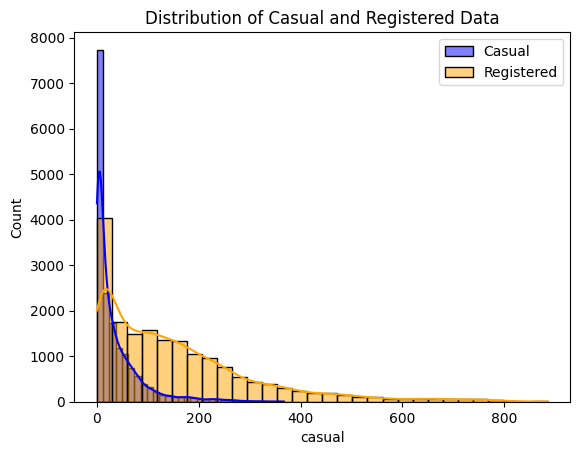

In [50]:
# 2. Visualize the distribution of casual and registered data
sns.histplot(df_hour_data['casual'], kde=True, bins=30, color='blue', label='Casual')
sns.histplot(df_hour_data['registered'], kde=True, bins=30, color='orange', label='Registered')
plt.legend()
plt.title('Distribution of Casual and Registered Data')
plt.show()


**Data Casual (Biru)**
1. Ada banyak data dengan frekuensi tinggi di sekitar 0, artinya banyak data dengan sedikit jam rental atau tidak ada rental sama sekali.
2. Distribusi data lebih banyak ke kanan dengan nilai rendah. Right-skewed.


**Data Registered (Oranye)**
1. Data registered memiliki sebaran lebih banyak daripada casual.
2. Nilai yang berada di sekitar angka 0 lebih sedikit, artinya sepeda lebih sering digunakan.
3. Distribusi data lebih banyak ke kanan namun puncaknya lebih rendah daripada casual. Right-skewed.

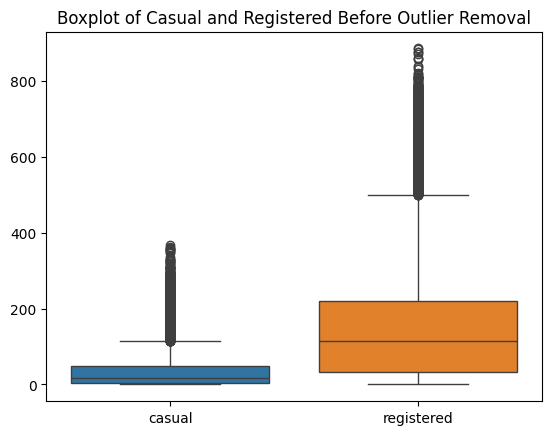

In [51]:
# 3. Visualize Boxplot before fixing outliers
sns.boxplot(data=df_hour_data[['casual', 'registered']])
plt.title('Boxplot of Casual and Registered Before Outlier Removal')
plt.show()

**Data Casual (Biru)**
1. Nilai Median sangat dekat dengan Q1, artinya sebagian besar data casual berada di rentang yang rendah.
2. Bentuk kotak yang kecil menunjukkan tidak banyak varian data.
3. Ada outliers di atas batas atas. Hal itu menunjukkan adanya permintaan sewa yang tinggi dan tidak biasa.

**Data Registered (Biru)**
1. Nilai Median berada dekat di tengah kotak, artinya distribusi data lebih seimbang dibanding casual.
2. Bentuk kotak yang lebih luas menunjukkan variasi data lebih banyak.
3. Ada outliers di atas batas atas. Hal itu menunjukkan adanya permintaan sewa yang tinggi dan tidak biasa.
4. Batas atas registered lebih tinggi dari casual, artinya registered lebih sering menyewa sepeda.

**Komparasi**

* Data registered memiliki jangkauan dan variasi yang jauh lebih tinggi dibandingkan dengan persewaan casual.
* Keduanya mempunyai outliers, tetapi registered lebih banyak.
* Data casual cenderung punya jumlah sewa yang sedikit, sedangkan registered memiliki jumlah yang lebih tinggi dan konsisten.


In [52]:
# 4. Check and fix outliers using IQR
for column in ['casual', 'registered']:
    Q1 = df_hour_data[column].quantile(0.25)
    Q3 = df_hour_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers
    outliers = df_hour_data[(df_hour_data[column] < lower_bound) | (df_hour_data[column] > upper_bound)]

    # Print outlier information
    print(f"Outliers in {column}: {len(outliers)} rows")
    print(f"Outlier values for {column}:")
    print(outliers[[column]])

    # Remove outliers
    df_hour_data = df_hour_data[
        (df_hour_data[column] >= lower_bound) & (df_hour_data[column] <= upper_bound)
    ]

Outliers in casual: 1192 rows
Outlier values for casual:
       casual
1633      144
1634      149
1635      124
1771      126
1772      174
...       ...
16817     122
16818     148
16819     164
16820     167
16821     139

[1192 rows x 1 columns]
Outliers in registered: 887 rows
Outlier values for registered:
       registered
2683          455
2684          463
2707          458
2732          486
2827          472
...           ...
17077         665
17086         536
17087         546
17101         585
17125         464

[887 rows x 1 columns]


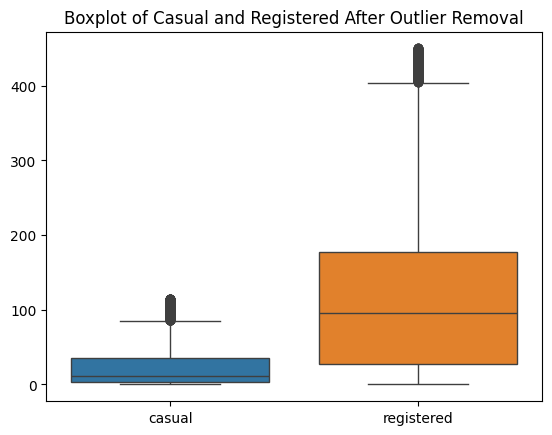

In [53]:
# 5. Visualize after fixing outliers
sns.boxplot(data=df_hour_data[['casual', 'registered']])
plt.title('Boxplot of Casual and Registered After Outlier Removal')
plt.show()

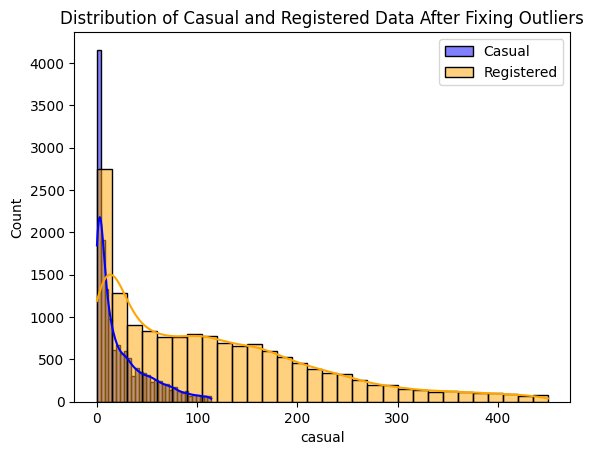

In [54]:
# 6. Visualize the distribution of casual and registered data after fixing outliers
sns.histplot(df_hour_data['casual'], kde=True, bins=30, color='blue', label='Casual')
sns.histplot(df_hour_data['registered'], kde=True, bins=30, color='orange', label='Registered')
plt.legend()
plt.title('Distribution of Casual and Registered Data After Fixing Outliers')
plt.show()

In [55]:
# 7. Check if cnt equals casual + registered after removing outliers
check_discrepancies(df_hour_data)


No discrepancies: cnt equals casual + registered for all rows.


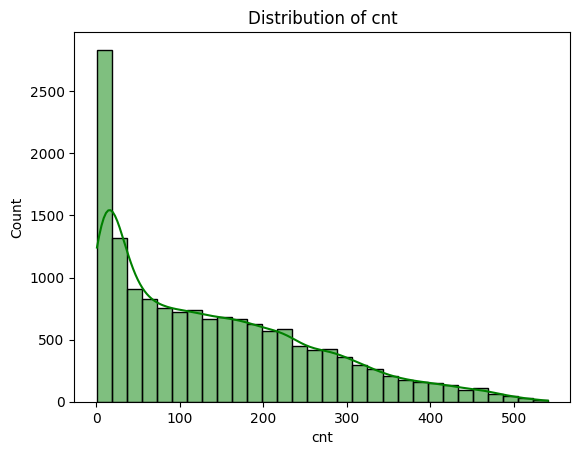

In [56]:
# 8. Visualize distribution of 'cnt'
sns.histplot(df_hour_data['cnt'], kde=True, bins=30, color='green')
plt.title('Distribution of cnt')
plt.show()

Skewness of cnt: 0.8077674018730567
Applying log transformation to cnt...


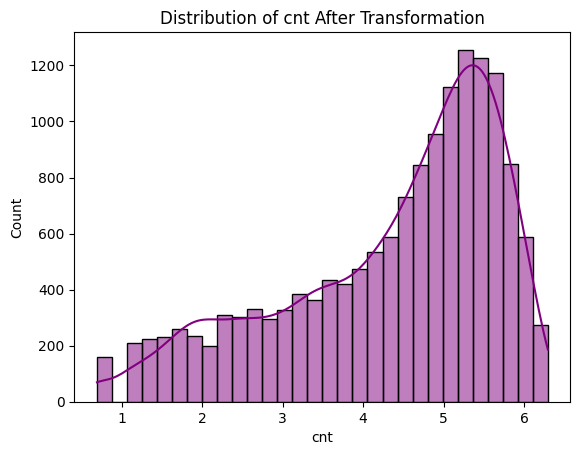

In [57]:
# 9. Check and fix skewness of 'cnt'
cnt_skewness = skew(df_hour_data['cnt'])
print(f"Skewness of cnt: {cnt_skewness}")

if abs(cnt_skewness) > 0.5:  # Consider |skewness| > 0.5 as moderately skewed
    print("Applying log transformation to cnt...")
    df_hour_data['cnt'] = np.log1p(df_hour_data['cnt'])  # log(1 + x) to handle zeros

# Recheck distribution after transformation
sns.histplot(df_hour_data['cnt'], kde=True, bins=30, color='purple')
plt.title('Distribution of cnt After Transformation')
plt.show()

**Insight:**
- Berdasarkan informasi karakteristik dataset, kolom 'dteday' seherusnya bertipe 'datetime'.

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Bagaimana perbedaan pola peminjaman sepeda antara pengguna biasa (casual) dibandingkan dengan pengguna terdaftar (registered)

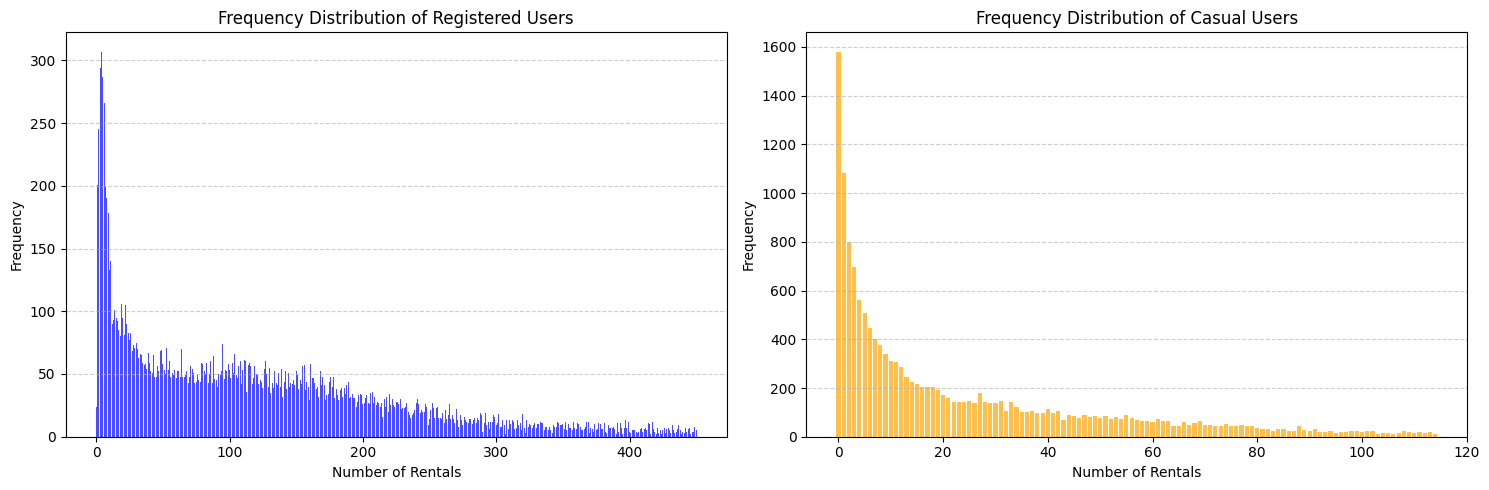

In [58]:
# Frequency distribution for registered and casual users
registered_freq = df_hour_data['registered'].value_counts().sort_index()
casual_freq = df_hour_data['casual'].value_counts().sort_index()

# Plot the frequency distributions
plt.figure(figsize=(15, 5))

# Registered users
plt.subplot(1, 2, 1)
plt.bar(registered_freq.index, registered_freq.values, color='blue', alpha=0.7)
plt.title('Frequency Distribution of Registered Users')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Casual users
plt.subplot(1, 2, 2)
plt.bar(casual_freq.index, casual_freq.values, color='orange', alpha=0.7)
plt.title('Frequency Distribution of Casual Users')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2